In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import time
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 

## Gather
Collecting and three sets of data for wrangling and analysis.
The first is the provided twitter archive for WeRate Dogs. 
The second is image prediction data downloaded from Udacity's website.
The third is examded tweet data gathered from Tweepy API.

In [2]:
# Read in the twitter archive csv to dataframe.
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Requesting the image prediction file from Udacity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Writing the image prediction file
with open(os.path.join(url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [3]:
# Reading in the image prediction csv to data frame.
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [6]:
# Create list of tweetIDs to search for extended twitter data from API
tweet_ids = twitter_archive.tweet_id.tolist()

# Connecting to Tweepy API and Searching for each tweet int he archive.
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
#https://stackoverflow.com/questions/47889565/reading-json-objects-from-text-file-into-pandas/47927217#47927217

consumer_key = ####
consumer_secret = ####
access_token = ####
access_secret = ####

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
tweets= []
deleted_tweet_list = []

with open('tweets.txt', 'w', encoding = 'utf-8') as file:
    for t_id in tweet_ids:
        try:
            tweets.append(api.get_status(t_id, tweet_mode = 'extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json)    
        except Exception as e:
            deleted_tweet_list.append(t_id)
    file.write(json.dumps(tweets))

# Creating a dataframe and write to CSV the tweet IDs that were not found in the API 
deleted_tweet_ID = pd.DataFrame(deleted_tweet_list)
deleted_tweet_ID.to_csv('deleted_tweets.csv', sep = ',', encoding='utf-8')

Rate limit reached. Sleeping for: 286
Rate limit reached. Sleeping for: 727
Rate limit reached. Sleeping for: 727


In [4]:
# Reading in the .txt file for the expanded tweet information 
# and putting it in a dataframe 
with open('tweets.txt','r') as tweets:
    tweet_data = json.loads(tweets.read()) 
    
tweet_extended_data = pd.DataFrame(tweet_data)

In [5]:
# Reading in the CSV of tweet IDs not found in Tweepy API.
tweets_without_extended_data = pd.read_csv('deleted_tweets.csv')

## Assess
During the assess segment I am exploring the data sets to determine what clean up is needed to improve evaluation of the data.  At the end is a summary of the cleaning and tidying that needs to be completed.

In [6]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Need to get read of the source code in source.
The last four columns look like a categories with none as an option. Need to see if any post has multiple categories.

In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Will need to delete the retweets and replys so the dataset is only looking at original posts.
Timestamp is the wrong data type, should be datetime.

In [8]:
# Gathering only the tweets with a categoy rating.
# https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
categories_min_one_true = twitter_archive[(twitter_archive.doggo != 'None') | 
                                          (twitter_archive.floofer != 'None')|
                                          (twitter_archive.pupper != 'None') | 
                                          (twitter_archive.puppo != 'None')]


In [9]:
# Showing all text in each cell of dataframe
pd.set_option('display.max_colwidth',-1)
# Subsetting for tweets with multiple categories
multiple_categories = categories_min_one_true[(categories_min_one_true.doggo != 'None') & (categories_min_one_true.floofer != 'None') |
                       (categories_min_one_true.doggo != 'None') & (categories_min_one_true.pupper != 'None') |
                       (categories_min_one_true.doggo != 'None') & (categories_min_one_true.puppo != 'None') |
                       (categories_min_one_true.floofer != 'None') & (categories_min_one_true.pupper != 'None') |
                       (categories_min_one_true.floofer != 'None') & (categories_min_one_true.puppo != 'None') |
                       (categories_min_one_true.pupper != 'None') & (categories_min_one_true.puppo != 'None') ]
len(multiple_categories)

14

In [10]:
multiple_categories

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377

There are 14 tweets which have multiple stages (doggo, floofer, pupper, and puppo.  Looking through the text, these are not mistakes, it does not seem to be a requirement that only one can be applied.  In some cases there are two dogs, in others it is saying the dog is neither.

In [11]:
# Subsetting for the reply tweets
twitter_archive_notnull= twitter_archive.dropna(subset = ['in_reply_to_status_id'])
twitter_archive_notnull

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [12]:
len(twitter_archive_notnull)

78

The majority of tweets int his data set are originals with only 78 of 2356 tweets as replys.  The replies have a different cadence to the text and do not seem to be the main business of WeRateDogs.  It will make sense to remove these.

In [13]:
# Subsetting for tweets without the URL location
expanded_url_isnull = twitter_archive[twitter_archive.expanded_urls.isnull()]
len(expanded_url_isnull)

59

59 entries have not URL to the tweet.  Maybe that can be filled in from the expanded data found int he Tweepy API?

In [14]:
# Checking counts of the denominators.
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

While the numorator can be above 10 (it is the style of the website) it is very rare that the denominator is not 10.  It would make sense to normalize to 10 as the denominators and use the numorator as a score.

In [15]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Looking at the image prediction dataframe nothing looks out of place.  Curious to make sure there are not dog pictures in there.

In [17]:
# Subsetting for image predicitions with at least one non-dog in the data
not_a_breed = image_predictions[(image_predictions.p1_dog != True)|
                               (image_predictions.p2_dog != True)|
                               (image_predictions.p3_dog != True)]
not_a_breed

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False


In [18]:
len(not_a_breed)

832

In [19]:
# Sorting the P1 for highest predicted to see where non-dogs appear
not_a_breed.sort_values(['p1_conf'], ascending = False)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False
1299,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False,Labrador_retriever,1.002880e-05,True,Eskimo_dog,1.434470e-06,True
1229,745433870967832576,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,barrow,0.999962,False,basset,1.448950e-05,True,wok,6.060880e-06,False
149,668636665813057536,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,komondor,0.999956,True,llama,4.309810e-05,False,ram,2.160900e-07,False
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,chow,0.999953,True,Tibetan_mastiff,2.335910e-05,True,dhole,3.010330e-06,False
230,670408998013820928,https://pbs.twimg.com/media/CU3FbQgVAAACdCQ.jpg,1,ping-pong_ball,0.999945,False,tennis_ball,1.763430e-05,False,racket,1.470730e-05,False
242,670449342516494336,https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg,1,peacock,0.999924,False,European_gallinule,2.987300e-05,False,agama,2.150760e-05,False
1447,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,web_site,0.999916,False,pug,7.657020e-05,True,menu,2.164680e-06,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
594,679503373272485890,https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg,1,porcupine,0.999846,False,meerkat,7.191480e-05,False,echidna,4.447290e-05,False


There are 832 image predictions of things that are not a dog breed.  Some score very high in the image prediction, since the P1_dog is labeled false this isn't an issue, just interesting to notice.

In [20]:
# Checking if the image predictions are in decending order 
image_predictions[(image_predictions.p1_conf <= image_predictions.p2_conf)|
                 (image_predictions.p2_conf <= image_predictions.p3_conf)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [21]:
# Subsetting for image preditions with no dog bread in the three top scores.
no_breed = image_predictions[(image_predictions.p1_dog != True)&
                               (image_predictions.p2_dog != True)&
                               (image_predictions.p3_dog != True)]
no_breed

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [22]:
len(no_breed)

324

All of the image predictions are ranked in descending order.  
324 images contain no dogs.
When this is meshed with the tweet data it would make sense to only keep the top rated dog, or not dog as the case may be.

In [23]:
tweet_extended_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",38986,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,...,False,NaN,NaN,NaN,8647,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'description': 'Your Only Source for Professional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 6451988, 'friends_count': 103, 'listed_count': 4089, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 132907, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 6840, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1515037507', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.t

There are some messy fields in the extended data set!  Entities, extended_entities, and user have a number of fields smashed together in them.  None are the minimum data the tidiness step will need (tweet_id, favorites count, and retweet_count) so will need to decide if these need to be cleaned or not used given the scope of this project.

In [24]:
tweet_extended_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2345 non-null object
display_text_range               2345 non-null object
entities                         2345 non-null object
extended_entities                2069 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null bool
full_text                        2345 non-null object
geo                              0 non-null object
id                               2345 non-null int64
id_str                           2345 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

The created_at field needs to be changed to a datetime format.
There are only 2345 entries, so I will expect to find 11 tweets that couldn't be found in the Tweepy API.

In [25]:
tweets_without_extended_data

,Unnamed: 0,0
0,0,888202515573088257
1,1,873697596434513921
2,2,869988702071779329
3,3,866816280283807744
4,4,861769973181624320
5,5,845459076796616705
6,6,842892208864923648
7,7,837012587749474308
8,8,827228250799742977
9,9,802247111496568832


#### Quality
- Remove tweets without extended information due to tweet since deleted or lost.
- Remove retweets.
- Remove replys.
- Convert numorators (scores) by normalizing denominators to 10. 
- Split source to text, getting rid of http and href info.
- Correct erroneous datatypes (time_stamp in archive and created_at in extended dataframes)
- Split ratings and link out of tweet text.
- Change dog names from 'None' to NaN.

#### Tidiness
- Create single dog stages column.
- Add retweet count and favorite count to tweet archive.
- Add Image prediction to tweet archive with only the top dog predicition.

## Clean

In [259]:
# Creating clean dataframes to clean-up
twitter_archive_clean = twitter_archive.copy()
tweet_extended_data_clean = tweet_extended_data.copy()
image_predictions_clean = image_predictions.copy()

### Tweets without extended data
##### Define
Delete 11 tweets from the archive that have been either beed deleted or for other reasons extended data can't be found in the Tweepy API.

In [260]:
# Creating list of tweet_Ids that could not be found in Tweepy API
exclude_list = tweets_without_extended_data.values.T.tolist()
exclude_list = exclude_list[1]

# picking all the tweets that are not on the list and writing them to the clean archive. 
twitter_archive_clean = twitter_archive_clean.loc[~twitter_archive_clean.tweet_id.isin(exclude_list)]

##### Test

In [261]:
# Checking that the 11 tweets were removed, 3356 goes to 2345
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2345 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2345 non-null object
source                        2345 non-null object
text                          2345 non-null object
retweeted_status_id           170 non-null float64
retweeted_status_user_id      170 non-null float64
retweeted_status_timestamp    170 non-null object
expanded_urls                 2286 non-null object
rating_numerator              2345 non-null int64
rating_denominator            2345 non-null int64
name                          2345 non-null object
doggo                         2345 non-null object
floofer                       2345 non-null object
pupper                        2345 non-null object
puppo                         2345 non-null object
dtypes: float64(4), int64(3), ob

### Remove Retweets
##### Define
181 records in archive are retweets. These are produced by a different source and have a different nature to them compared to the rest of the dataset.  The next step is to remove these from the clean archive and extended datasets.

In [262]:
# Subset out the retweeted tweet_ids.
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
tweet_extended_data_clean = tweet_extended_data_clean[tweet_extended_data_clean.retweeted_status.isnull()]

##### Test

In [263]:
# Checking that there are no retweets remaining.
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [264]:
tweet_extended_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2344
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2175 non-null object
display_text_range               2175 non-null object
entities                         2175 non-null object
extended_entities                1994 non-null object
favorite_count                   2175 non-null int64
favorited                        2175 non-null bool
full_text                        2175 non-null object
geo                              0 non-null object
id                               2175 non-null int64
id_str                           2175 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

### Remove Replys
##### Define
78 records in archive are replys to tweets. These have a different nature and approach than those that are originals. Subset out the replys from the clean archive and extended datasets.

In [265]:
# Subset out the reply tweets.
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]
tweet_extended_data_clean = tweet_extended_data_clean[tweet_extended_data_clean.in_reply_to_status_id_str.isnull()]

##### Test

In [266]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [267]:
tweet_extended_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2344
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2097 non-null object
display_text_range               2097 non-null object
entities                         2097 non-null object
extended_entities                1971 non-null object
favorite_count                   2097 non-null int64
favorited                        2097 non-null bool
full_text                        2097 non-null object
geo                              0 non-null object
id                               2097 non-null int64
id_str                           2097 non-null object
in_reply_to_screen_name          0 non-null object
in_reply_to_status_id            0 non-null float64
in_reply_to_status_id_str        0 non-null object
in_reply_to_user_id              0 non-null float64
in_reply_to_user_id_str          0 non-null object
i

### Normalize Rating

##### Define
Some records have a denominator that is not 10.  Scale each numorator so the denominator is 10, so ratings are comparable and then drop the denominator

In [268]:
# Multiply the numorator by 10 divided by the denominator.  
twitter_archive_clean['rating_numerator'] = twitter_archive_clean.rating_numerator * \
(10/twitter_archive_clean.rating_denominator)

# Drop the denominator.
twitter_archive_clean = twitter_archive_clean.drop('rating_denominator', axis = 1)

##### Test

In [269]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,Franklin,None,None,None,None


### Clean Source
##### Define
The source field in the archive and extended data has source code and the website around the name of the source.  Remove excess information so only the source of the tweet remains.

In [270]:
# Split scource data to strip it down to just the source for the clean archive.
# Check the value counts to make sure remaining is clean.
twitter_archive_clean.source = twitter_archive_clean.source.str.replace('<','>').str.split('>').str[2]

In [271]:
# Split scource data to strip it down to just the source for the clean archive.
# Check the value counts to make sure remaining is clean.
tweet_extended_data_clean.source = tweet_extended_data_clean.source.str.replace('<','>').str.split('>').str[2]

##### Test

In [272]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

In [273]:
tweet_extended_data_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

### Correct Erroneous Datatypes
##### Define
Convert the time_stamp in twitter_archive and created_at in tweet_extended_data to datetime.
Convert all the tweet ids to strings.

In [274]:
# To datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
tweet_extended_data_clean.created_at = pd.to_datetime(tweet_extended_data_clean.created_at)
# Making tweet_id/id to strings
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
tweet_extended_data_clean.id = tweet_extended_data_clean.id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

##### Test

In [275]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float64(5), object(10)
memory usage: 278.5+ KB


In [276]:
tweet_extended_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2344
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2097 non-null datetime64[ns]
display_text_range               2097 non-null object
entities                         2097 non-null object
extended_entities                1971 non-null object
favorite_count                   2097 non-null int64
favorited                        2097 non-null bool
full_text                        2097 non-null object
geo                              0 non-null object
id                               2097 non-null object
id_str                           2097 non-null object
in_reply_to_screen_name          0 non-null object
in_reply_to_status_id            0 non-null float64
in_reply_to_status_id_str        0 non-null object
in_reply_to_user_id              0 non-null float64
in_reply_to_user_id_str          0 non-null

In [277]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Remove Rating and Link From Text
##### Define
Text has the rating and URL which is in other columns.  Strip from text.

In [278]:
# Splits the text in the rating, then removes numbers.
twitter_archive_clean.text = twitter_archive_clean.text.str.split('/').str[0].str.replace('\d+','')

##### Test

In [279]:
twitter_archive_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such.",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it.,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy.,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,Cassie,doggo,None,None,None


### Dog name 'None' to NaN
##### Define
Some of the dogs have no name.  Rather than have None in that field, make it empty.

In [280]:
# Replace None with NaN in name field
twitter_archive_clean.name.replace('None', np.nan, inplace = True)

##### Test

In [281]:
twitter_archive_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such.",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,NaN,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it.,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy.,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,NaN,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,Cassie,doggo,None,None,None


In [282]:
twitter_archive_clean.name.value_counts()

a             55
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker        9 
Penny         9 
Sadie         8 
Lola          8 
Winston       8 
the           8 
Daisy         7 
Toby          7 
Bella         6 
Stanley       6 
Oscar         6 
an            6 
Bailey        6 
Jax           6 
Koda          6 
Bo            6 
Buddy         5 
Milo          5 
Louis         5 
Chester       5 
Dave          5 
Scout         5 
Leo           5 
Rusty         5 
Bentley       5 
             .. 
Mosby         1 
Spark         1 
Rhino         1 
Napolean      1 
Tove          1 
Bodie         1 
Mike          1 
Ralf          1 
Flash         1 
Bobble        1 
Obie          1 
Maks          1 
Snickers      1 
Anakin        1 
Meatball      1 
Ferg          1 
Lugan         1 
Edgar         1 
DonDon        1 
Huxley        1 
Humphrey      1 
Sonny         1 
Cheryl        1 
Brutus        1 
Strider       1 
Ralphus       1 
officially    1 
General       

## Tidiness
### Create Single Dog Stages Column
Currently the dog stages are divided into four columns (doggo, fluffer, pupper, puppo).  These should be converted into a single column.

In [283]:
# Replace None in dog stages with space
twitter_archive_clean.doggo.replace('None', '', inplace = True)
twitter_archive_clean.floofer.replace('None', '', inplace = True)
twitter_archive_clean.pupper.replace('None', '', inplace = True)
twitter_archive_clean.puppo.replace('None', '', inplace = True)

In [284]:
# Combining all the dog stages into one column
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + \
twitter_archive_clean.pupper + twitter_archive_clean.puppo

twitter_archive_clean.dog_stage.value_counts()

                1761
pupper          221 
doggo           72  
puppo           23  
doggopupper     9   
floofer         9   
doggopuppo      1   
doggofloofer    1   
Name: dog_stage, dtype: int64

In [285]:
# Renaming all dog_stages
twitter_archive_clean.dog_stage.replace('', 'None', inplace = True)
twitter_archive_clean.dog_stage.replace('pupper', 'Pupper', inplace = True)
twitter_archive_clean.dog_stage.replace('doggo', 'Doggo', inplace = True)
twitter_archive_clean.dog_stage.replace('puppo', 'Puppo', inplace = True)
twitter_archive_clean.dog_stage.replace('doggopupper', 'Doggo & Pupper', inplace = True)
twitter_archive_clean.dog_stage.replace('floofer', 'Floofer', inplace = True)
twitter_archive_clean.dog_stage.replace('doggopuppo', 'Doggo & Puppo', inplace = True)
twitter_archive_clean.dog_stage.replace('doggofloofer', 'Doggo & Floofer', inplace = True)

In [286]:
# Deleting the individual dog stage columns
twitter_archive_clean = twitter_archive_clean.drop('doggo', axis = 1)
twitter_archive_clean = twitter_archive_clean.drop('floofer', axis = 1)
twitter_archive_clean = twitter_archive_clean.drop('pupper', axis = 1)
twitter_archive_clean = twitter_archive_clean.drop('puppo', axis = 1)

### Add Retweet Count and Favorited Count
The retweet and favorited counts from the extended data needs to be merged with the archive data to get the stats for the tweet with the tweet.

In [287]:
# Creating new dataframe with tweet stats.
tweet_stats = tweet_extended_data_clean[['id','favorite_count','retweet_count']]
# Renaming id to tweet_id
tweet_stats = tweet_stats.rename(index = str, columns={'id':'tweet_id'})
tweet_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2097 non-null object
favorite_count    2097 non-null int64
retweet_count     2097 non-null int64
dtypes: int64(2), object(1)
memory usage: 65.5+ KB


In [288]:
# Merging the tweet_stats into the archive
twitter_archive_clean = pd.merge(twitter_archive_clean,tweet_stats, on =['tweet_id'], how = 'left')

In [289]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
name                          1494 non-null object
dog_stage                     2097 non-null object
favorite_count                2097 non-null int64
retweet_count                 2097 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2), object(7)
memory usage: 262.1+ KB


### Add Image Prediction
Merge the image predictions the highest rated dog top for each tweet. 

In [290]:
# Subsetting for the top, second, or third predition being the first of a dog.
first_dog = image_predictions_clean.loc[(image_predictions_clean.p1_dog == True,
                                       ['tweet_id','p1','p1_conf'])]
second_dog = image_predictions_clean.loc[(image_predictions_clean.p1_dog == False)& 
                                         (image_predictions_clean.p2_dog == True),
                                         ['tweet_id','p2','p2_conf']]
third_dog = image_predictions_clean.loc[(image_predictions_clean.p1_dog == False)& 
                                        (image_predictions_clean.p2_dog == False)&
                                        (image_predictions_clean.p3_dog == True),
                                         ['tweet_id','p3','p3_conf']]

In [291]:
# Renaming the columns so they match and are descriptive
first_dog = first_dog.rename(index = str, columns={'p1':'breed_prediction',
                                               'p1_conf':'confidence'})
second_dog = second_dog.rename(index = str, columns={'p2':'breed_prediction',
                                               'p2_conf':'confidence'})
third_dog = third_dog.rename(index = str, columns={'p3':'breed_prediction',
                                               'p3_conf':'confidence'})

In [292]:
# Creating one dataframe with the top preed predition.
top_dog = [first_dog, second_dog,third_dog]
top_dog = pd.concat(top_dog)

In [293]:
top_dog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1751 entries, 0 to 2026
Data columns (total 3 columns):
tweet_id            1751 non-null object
breed_prediction    1751 non-null object
confidence          1751 non-null float64
dtypes: float64(1), object(2)
memory usage: 54.7+ KB


Only 1751 of 2075 image predictions had a dog breed as one of the top three predictions.

In [294]:
# Merging the top dog precitions into the archive
twitter_archive_clean = pd.merge(twitter_archive_clean,top_dog, on =['tweet_id'], how = 'left')

In [295]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
name                          1494 non-null object
dog_stage                     2097 non-null object
favorite_count                2097 non-null int64
retweet_count                 2097 non-null int64
breed_prediction              1666 non-null object
confidence                    1666 non-null float64
dtypes: datetime64[ns](1), fl

Some of the higher prediction tweets have already been removed for other reasons above.

## Storing The Cleaned Data

In [296]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Vizualizing

### Insight 1: Popularity

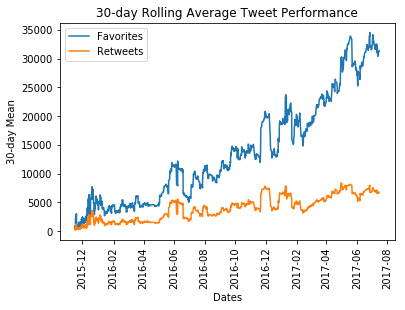

In [297]:
%matplotlib inline
# Creating column of a rolling 30-day average for favorites and retweets
twitter_archive_clean['rolling_favorite'] = twitter_archive_clean.favorite_count.rolling(window = 30).mean()
twitter_archive_clean['rolling_retweet'] = twitter_archive_clean.retweet_count.rolling(window = 30).mean()

# Plotting the 30-day average on favorites and retweets.
plt.plot(twitter_archive_clean.timestamp, twitter_archive_clean.rolling_favorite, label = 'Favorites')
plt.plot(twitter_archive_clean.timestamp, twitter_archive_clean.rolling_retweet, label = 'Retweets')
plt.title('30-day Rolling Average Tweet Performance')
plt.xlabel('Dates')
plt.ylabel('30-day Mean')
plt.legend(loc='best')
plt.xticks(rotation='vertical')
plt.show();

The first observation is looking at the popularity of favorites and retweets over time of the tweets int he archive.  In assessing this feed it seems important to understand if this content is hitting home with readers or if it is a flop that is done for personal entertainment. To reduce the noise a 30-day rolling average was used and it does show an increase over time in the amount of both actions of WeRateDogs' tweets.  The favorites far out pace the increase in retweets.

### Insight 2: Tag use

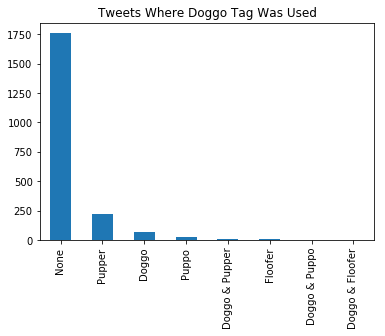

In [298]:
# Plot number of tweets using each Dog_stage type.

twitter_archive_clean['dog_stage'].value_counts().plot(kind='bar', 
                                     title='Tweets Where Doggo Tag Was Used')


Not being a follower of WeRateDogs I was intrigued when first exploring the data about these fields, initially thinking it was categories most would fall into. On further exploration it seems these are used on relatively few tweets; it is a really minor thing that WeRateDogs uses and it is not addressed in their Twitter bio or on the website.  They also don't hashtag it in most of the tweets, which obscures it more.

### Insight 3: Breeds

In [113]:
# Counting the occurance of each breed being the top prediction for tweets.
twitter_archive_clean.breed_prediction.value_counts()

golden_retriever                  156
Labrador_retriever                106
Pembroke                          94 
Chihuahua                         90 
pug                               62 
toy_poodle                        50 
chow                              48 
Samoyed                           42 
Pomeranian                        41 
malamute                          33 
French_bulldog                    31 
Chesapeake_Bay_retriever          31 
cocker_spaniel                    30 
miniature_pinscher                24 
Eskimo_dog                        22 
Cardigan                          21 
German_shepherd                   21 
Staffordshire_bullterrier         20 
beagle                            20 
Siberian_husky                    20 
Shih-Tzu                          20 
Maltese_dog                       19 
Shetland_sheepdog                 18 
Rottweiler                        18 
Italian_greyhound                 17 
basset                            17 
kuvasz      

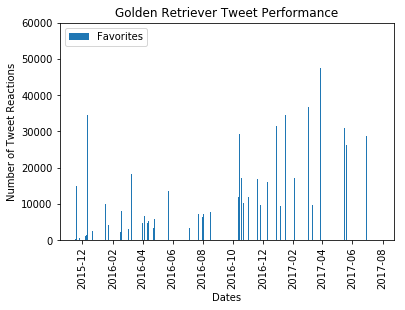

In [114]:
# Plotting the 30-day average on favorites and retweets.
plt.bar(twitter_archive_clean[twitter_archive_clean.breed_prediction == 'golden_retriever'].timestamp,
         twitter_archive_clean[twitter_archive_clean.breed_prediction == 'golden_retriever'].favorite_count,
         label = 'Favorites', linewidth = .5)
plt.title('Golden Retriever Tweet Performance')
plt.xlabel('Dates')
plt.ylabel('Number of Tweet Reactions')
plt.legend(loc='best')
plt.xticks(rotation='vertical')
plt.ylim(ymax = 60000)
plt.show();

Taking the top predicted breed of dog for each tweet by confidence level, there is 113 different breeds identified in the tweets.  There are 431 tweets that the prediction dataset didn't have dog breed predictions.  Many of these breeds only have a few tweets so changes in favorites and retweets may not tell a lot.  Looking at Golden Retriever, the most popular breed identified, it is interesting how steadily it has been featured in the tweets over time, and there have been more higher favorited tweets later, matching the overall feed performance. 